# **Clone project from github to drive**



In [2]:
!git clone https://github.com/darkdante2209/DeepXi

Cloning into 'DeepXi'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 1478 (delta 0), reused 19 (delta 0), pack-reused 1446
Receiving objects: 100% (1478/1478), 267.11 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (695/695), done.


# **Install Tensorflow (patch 1.14) and necessary package**

In [3]:
%cd DeepXi/

/content/DeepXi


In [4]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14

Uninstalling tensorflow-2.2.0rc2:
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 377.0MB 39kB/s 
     |████████████████████████████████| 3.2MB 36.6MB/s 
     |████████████████████████████████| 491kB 31.1MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0


In [5]:
colab_requirements = [
    "pip install librosa",
    "pip install -r requirements.txt",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [0]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
import urllib.request
import soundfile as sf
%matplotlib inline

# **Upload file noise speech from PC**

In [7]:
%cd set/test_noisy_speech/

/content/DeepXi/set/test_noisy_speech


In [8]:
from google.colab import files
uploaded = files.upload()

Saving 61-70968-0056_SIGNAL019_10dB.wav to 61-70968-0056_SIGNAL019_10dB.wav


# **Copy filename of noise speech file (example: 61-70968-0056_SIGNAL019_10dB.wav) and replace with the filename in the path below - only the filename, not all the path**

In [0]:
data, samplerate = sf.read('/content/DeepXi/set/test_noisy_speech/61-70968-0056_SIGNAL019_10dB.wav')
data = data

# **Playback noise speech file**

In [10]:
IPython.display.Audio(data=data, rate=samplerate)

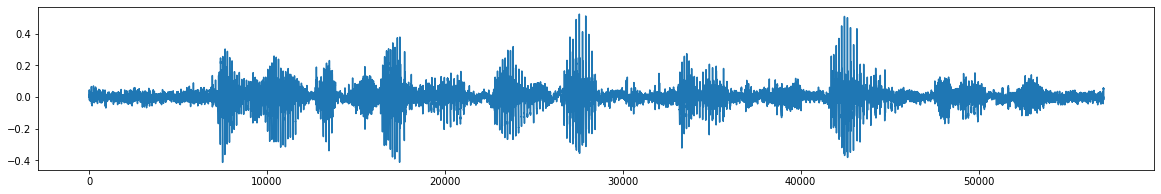

In [11]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

# **Reference to denoise**

In [12]:
%cd ../../

/content/DeepXi


In [13]:
!python3 deepxi.py --infer 1 --out_type y --gain mmse-lsa --ver '3f' --epoch 175 --gpu 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# **Playback the file after denoise (remember to replace the file name in the path below like the path before - only the filename, not all the path)**

In [0]:
reduced_data, reduced_samplerate = sf.read('/content/DeepXi/out/3f/e175/mmse-lsa/y/61-70968-0056_SIGNAL019_10dB.wav')

In [16]:
IPython.display.Audio(data=reduced_data, rate=reduced_samplerate)

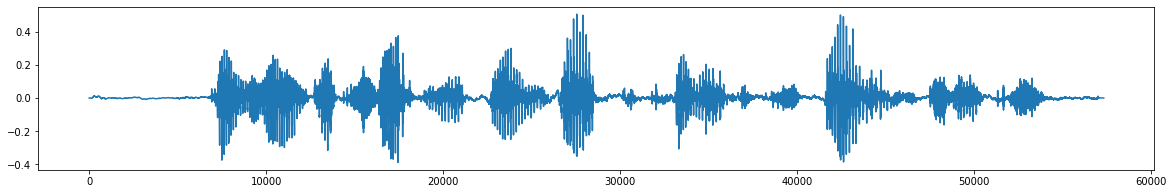

In [17]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_data)

# **Compare the file before and after**

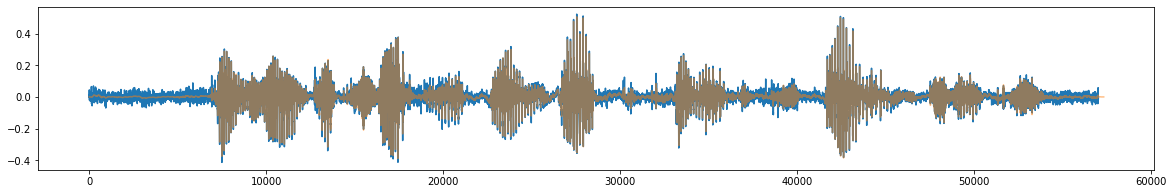

In [18]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)
ax.plot(reduced_data, alpha = 0.5)